## Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

## Preprocessing

In [75]:
train_path = "Train.csv"
test_path = "Test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

C:\Users\vrush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (746,835) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\vrush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [76]:
test_df

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20437,OL0I6O5R,3.862726e+04,3.501103e+04,2.825183e+04,2.813549e+04,3.670330e+04,3.316264e+04,6.330923e+03,1.489258e+04,4.805880e+03,...,0,0,0,0,6.0,6.0,4.0,5.0,5.0,1.0
20438,OL0I65ZW,2.578050e+04,1.933538e+04,1.546830e+04,1.546830e+04,1.948715e+04,1.558972e+04,1.313231e+04,1.407065e+04,1.288176e+04,...,0,1,0,1,9.0,9.0,9.0,7.0,7.0,7.0
20439,OL0I6CXW,1.755580e+05,1.406457e+05,1.125832e+05,1.125832e+05,1.253004e+05,1.022403e+05,6.141444e+04,7.859983e+04,6.033025e+04,...,1,2,1,2,27.0,27.0,18.0,10.0,10.0,5.0
20440,O2VIUO,6.806643e+04,6.338058e+04,6.413642e+04,6.413642e+04,7.082305e+04,7.078595e+04,2.017906e+04,1.849832e+04,4.015468e+04,...,0,0,0,0,2.0,2.0,0.0,9.0,9.0,3.0


1st column is ID and Second columns is Target variable

In [77]:
# Adding one because we will split at this point
train_last_index = 17521

In [78]:
train_df.shape, test_df.shape

((17521, 2395), (20442, 2394))

### Null value check

In [79]:
X = pd.concat((train_df.iloc[:,2:],test_df.iloc[:,1:]),axis=0)
X.shape

(37963, 2393)

In [80]:
# Columns Null check
def null_cols(d,columns):
  na = d[columns].isna().sum().sort_values(ascending=False)
  return na[na > 0].index.to_list()

#### Numerical columns

In [81]:
num_cols = X.select_dtypes(include="number").columns
print('Total',len(num_cols))

na_cols = null_cols(X,num_cols)
print('1.Null columns',len(na_cols))

if len(na_cols) > 0:
  X[na_cols]= X[na_cols].fillna(method='ffill')
  X[na_cols]= X[na_cols].fillna(method='bfill')
  na_cols = null_cols(X,num_cols)
  print('2.Null columns',len(na_cols))

Total 2380
1.Null columns 746
2.Null columns 0


#### Categorical columns

In [82]:
cat_cols = X.select_dtypes(exclude="number").columns.to_list()

print('Total',len(cat_cols))
na_cols = null_cols(X,cat_cols)
print('1.Null columns',len(na_cols))

if len(na_cols) > 0:
  X[na_cols]= X[na_cols].fillna(method='ffill')
  X[na_cols]= X[na_cols].fillna(method='bfill')
  na_cols = null_cols(X,cat_cols)
  print('2.Null columns',len(na_cols))

Total 13
1.Null columns 13
2.Null columns 0


In [11]:
for col in cat_cols:
  print('Before',X[col].value_counts())
  X[col] = X[col].replace({0.0:0,'-':2})
  print('After',X[col].value_counts(),'\n')

Before 0              37326
0                231
0.058166303      165
0.057142859      103
0.255550626       97
0.079859571       16
2                 11
0.442619578        8
0.069985428        6
Name: Col702, dtype: int64
After 0    37952
2       11
Name: Col702, dtype: int64 

Before 0                      9420
2                      3604
0.349927106            1518
0.447213596            1423
0                      1392
                       ... 
0.446132095               1
-0.063921486              1
0.039904182               1
-0.0003611359999999       1
0.392116029               1
Name: Col733, Length: 391, dtype: int64
After 0                      9420
2                      3604
0.349927106            1518
0.447213596            1423
0                      1392
                       ... 
0.446132095               1
-0.063921486              1
0.039904182               1
-0.0003611359999999       1
0.392116029               1
Name: Col733, Length: 391, dtype: int64 

Before 2 

#### Separating the Y variable

In [83]:
y = train_df.iloc[:,[1]]
print( y.sample(5))
y.shape

       Col2
17276     0
11191     0
3221      0
4764      0
13835     0


(17521, 1)

In [84]:
y.columns

Index(['Col2'], dtype='object')

In [85]:
null_cols(y,y.columns)

[]

## Feature Selection and Dimentionality reduction

### Feature selection method

In [86]:
train_df.shape

(17521, 2395)

In [87]:
y_train.shape

(17521,)

In [88]:
y.shape

(17521, 1)

### Dimensionality reduction using t-SNE


 n | divergence | time
---|---| ---
3| 1.552975 | 50 mins 

In [89]:
tsne_data = np.load("tsne.npy")
tsne_data

array([[ 12.966208  ,   7.6291747 , -10.028655  ],
       [-14.196468  ,  21.274002  ,  -8.30545   ],
       [-17.39448   ,  20.732141  ,  -0.725202  ],
       ...,
       [  5.2431226 ,  -5.682371  ,  -6.543432  ],
       [  1.7690104 , -10.042925  ,   2.0753376 ],
       [-17.307201  ,  20.773645  ,  -0.72306323]], dtype=float32)

In [91]:
if tsne_data is None :
    if X.isna().sum().sum() < 1:      
        model = TSNE(n_components=3,random_state=0,verbose=1)
        tsne_data = model.fit_transform(X)
        np.save('tsne',tsne_data)
    else:
        print('Null vals present')

In [92]:
tsne_data.shape

(37963, 3)

In [93]:
type(tsne_data)

numpy.ndarray

#### EDA with tsne data

In [94]:
# X_train and X_test are both without ID column
X_train = tsne_data[:train_last_index]
X_test = tsne_data[train_last_index:]

In [95]:
X_train[:15]

array([[ 12.966208 ,   7.6291747, -10.028655 ],
       [-14.196468 ,  21.274002 ,  -8.30545  ],
       [-17.39448  ,  20.732141 ,  -0.725202 ],
       [-15.47157  ,  21.346645 ,  -1.2622602],
       [-17.6458   ,  20.615833 ,  -0.7474113],
       [-15.011502 ,  21.37602  ,  -1.7775688],
       [  3.7999327,  -9.978249 ,   4.8382   ],
       [  3.3549275,   3.6714833, -10.211234 ],
       [  6.1283283,   1.5645589,   6.205583 ],
       [ 12.628237 ,  10.502278 , -15.479282 ],
       [  0.1106067, -10.575792 ,   1.2182759],
       [-18.000906 ,   6.8030334,  -6.633424 ],
       [ 13.115993 , -11.816519 , -14.662633 ],
       [-12.717318 ,  18.58738  , -10.004136 ],
       [  6.9227633,  -5.1464787,   4.9544973]], dtype=float32)

In [96]:
X_train.shape

(17521, 3)

In [97]:
join_data = np.hstack((X_train,y))
print(join_data.shape)
dfa = pd.DataFrame(join_data,columns=("dim1",'dim2','dim3','label'))
dfa.head()

(17521, 4)


,dim1,dim2,dim3,label
0,12.966208,7.629175,-10.028655,1.0
1,-14.196468,21.274002,-8.305450,0.0
2,-17.394480,20.732141,-0.725202,0.0
3,-15.471570,21.346645,-1.262260,0.0
4,-17.645800,20.615833,-0.747411,0.0


In [98]:
dfa.describe()

,dim1,dim2,dim3,label
count,17521.000000,17521.000000,17521.000000,17521.000000
mean,-0.304923,-0.110430,-0.087895,0.100508
std,10.946952,11.210497,10.088150,0.300685
min,-23.939781,-24.082001,-21.857027,0.000000
25%,-9.103204,-9.647172,-8.245725,0.000000
50%,-0.146481,0.380391,-0.070401,0.000000
75%,8.429140,8.930604,8.053248,0.000000
max,25.324026,26.590508,23.967939,1.000000


In [99]:
# checking the distribution per labels
dfa['label'].value_counts()

0.0    15760
1.0     1761
Name: label, dtype: int64

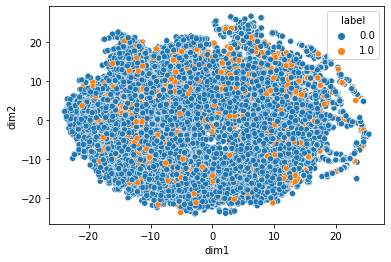

In [100]:
ax = sns.scatterplot(data=dfa,x='dim1',y='dim2',hue='label')

### dim1 v/s dim2 v/s dim3

C:\Users\vrush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vrush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vrush\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

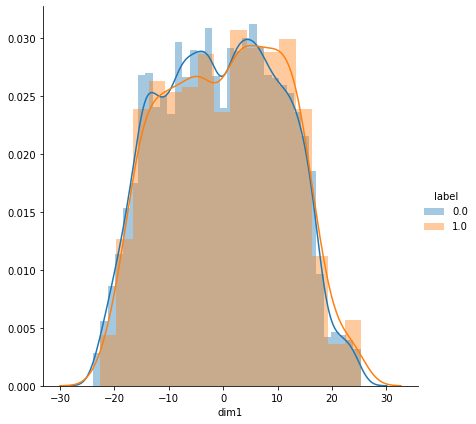

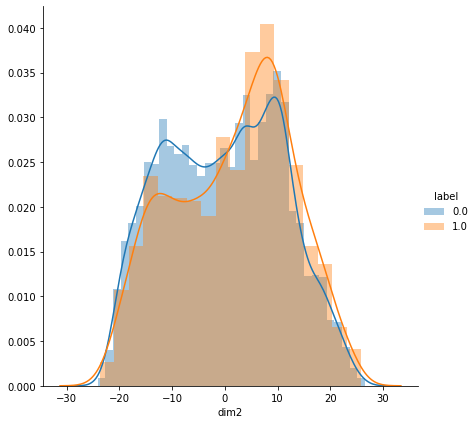

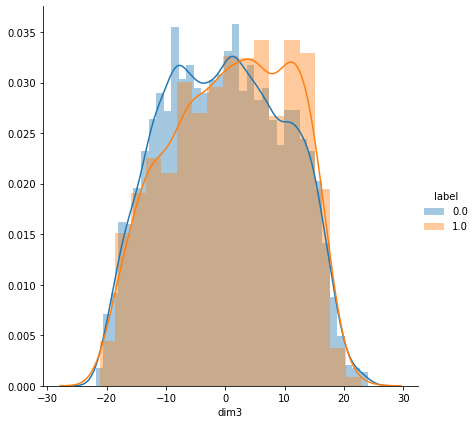

In [101]:
ax = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim1').add_legend()
ax1 = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim2').add_legend()
ax3 = sns.FacetGrid(dfa,hue="label",height=6).map(sns.distplot,'dim3').add_legend()

### Test data prep

In [102]:
test_id = test_df.iloc[:,0]
test_id.shape

(20442,)

In [103]:
test = pd.DataFrame(X_test,columns=["dim1",'dim2','dim3'])
test.describe()

,dim1,dim2,dim3
count,20442.000000,20442.000000,20442.000000
mean,0.344181,-0.077773,0.218283
std,10.500479,10.951061,10.244196
min,-24.032606,-24.129465,-21.797735
25%,-7.882465,-9.187041,-7.969855
50%,0.811122,0.172071,-0.026267
75%,8.608865,8.602738,8.531698
max,25.332592,26.505873,23.942247


## Modelling

In [104]:
X_train.shape, y.shape, X_test.shape

((17521, 3), (17521, 1), (20442, 3))

### Choosing random models

## Hyperparameter tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.6657894736842105, 1: 0.3342105263157895}}


<AxesSubplot:xlabel='weight'>

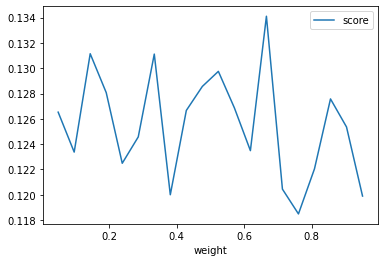

In [110]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [111]:
data_out.sort_values(by="score",ascending=False)

,score,weight
13,0.134107,0.665789
2,0.131145,0.144737
6,0.131116,0.334211
10,0.129752,0.523684
9,0.128560,0.476316
3,0.128072,0.192105
17,0.127575,0.855263
11,0.126869,0.571053
8,0.126663,0.428947
0,0.126528,0.050000


In [112]:
clf = DecisionTreeClassifier(**grid_result.best_params_).fit(X_train, y_train)
print(clf)
y1 = clf.predict(X_train)

generate_model_report(y['Col2'],y1)

# Confusion matrix
pd.crosstab(y1,y['Col2'],rownames=['Predicted'], colnames=['Actual'])


DecisionTreeClassifier(class_weight={0: 0.6657894736842105,
                                     1: 0.3342105263157895})
Accuracy =  0.9971462816049312
Precision =  0.9988338192419826
Recall =  0.9727427597955707
F1 Score =  0.9856156501726122


Actual,0,1
Predicted,,
0,15758,48
1,2,1713


In [115]:
import pickle
filename = 'bank_model.sav'
pickle.dump(grid_result, open(filename, 'wb'))

In [124]:
import pickle
filename = 'bank_model1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [125]:
clf

DecisionTreeClassifier(class_weight={0: 0.6657894736842105,
                                     1: 0.3342105263157895})

In [127]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_train)
print(result)

[1 0 0 ... 0 0 0]
